## Predict if an industry experienced student enrolled in a course is interested in a job change

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Zeta_Analytics Dataset.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

## Data Preprocessing

In [4]:
# CHeck columns with missing values
cols = df.columns[df.isna().any()].tolist()

# Print number of columns and their names which has missing values
print("COlumns with missing values",cols)
print("Number of Columns with missing values",len(cols))

COlumns with missing values ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
Number of Columns with missing values 8


In [5]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


In [6]:
# Select Categorical columns names with missing data
cat_miss_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

In [7]:
# check unique records in each categorical columns with missing values
for col in cat_miss_cols:
    print(df[col].unique())

['Male' nan 'Female' 'Other']
['no_enrollment' 'Full time course' 'Part time course' nan]
['Graduate' 'Masters' 'High School' 'Phd' nan 'Primary School']
['STEM' 'Other' 'No Major' nan 'Business Degree' 'Arts' 'Humanities']
['100-500' '<10' '50-99' nan '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
['Pvt Ltd' 'Funded Startup' 'Public Sector' nan 'Early Stage Startup'
 'NGO' 'Other']


In [8]:
# Fill missing values of categorical columns with 'NA'
df[cat_miss_cols] = df[cat_miss_cols].fillna('NA')

In [9]:
# Again check columns with missing values
cols = df.columns[df.isna().any()].tolist()
# Print number of columns and their names which has missing values
print("COlumns with missing values",cols)
print("Number of Columns with missing values",len(cols))

COlumns with missing values ['experience', 'last_new_job']
Number of Columns with missing values 2


In [10]:
# Check unique values in 'experience', 'last_new_job' columns
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '>20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '<1' '19' '18' '17' nan '20']
['1' '2' '3' '>4' 'never' '4' nan]


#### Replace text data with numbers in some of the columns which have numerical values

In [11]:
for col in num_miss_cols:
    # replace '<','>' with empty string
    df[col] = df[col].astype(str).replace('>', '').replace('<', '')
    # replace 'never' with '0'
    df[col] = df[col].astype(str).replace('never','0')

In [12]:
# now again check unique values of 'experience', 'last_new_job' columns
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '>20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '<1' '19' '18' '17' 'nan' '20']
['1' '2' '3' '>4' '0' '4' 'nan']


In [13]:
import re

for col in num_miss_cols:
    # Replace '<' and '>' with empty string using regular expressions
    df[col] = df[col].astype(str).apply(lambda x: re.sub(r'[<>]', '', x)) #function from the re module to substitute all occurrences of '<' and '>' with an empty string within each string value x


In [14]:
# now again check unique values of 'experience', 'last_new_job' columns
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '19' '18' '17' 'nan']
['1' '2' '3' '4' '0' 'nan']


In [15]:
# Convert Categorical columns 'experience', 'last_new_job' into Numerical
# Also replace 'nan' with proper 'NaN'
for col in num_miss_cols:
    df[col] = pd.to_numeric(df[col].replace('nan', np.NaN))

### Now we need to encode categorical columns into numerical for training process

In [16]:
# Select categorical columns
cat_cols = df.select_dtypes(include='O').columns
cat_cols

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [17]:
# Find number of nnumber of unique values of each categorical column
for col in cat_cols:
    print(col,df[col].nunique())

city 123
gender 4
relevent_experience 2
enrolled_university 4
education_level 6
major_discipline 7
company_size 9
company_type 7


In [18]:
# Remove 'enrollee_id' and 'city' columns because too many unique values
df.drop(['enrollee_id','city'], axis=1, inplace=True)

In [19]:
# get new categorical columns after dropping above columns
cat_cols = df.select_dtypes(include='O').columns

# Find number of unique values of each categorical column
for col in cat_cols:
    print(col,df[col].unique())

gender ['Male' 'NA' 'Female' 'Other']
relevent_experience ['Has relevent experience' 'No relevent experience']
enrolled_university ['no_enrollment' 'Full time course' 'Part time course' 'NA']
education_level ['Graduate' 'Masters' 'High School' 'Phd' 'NA' 'Primary School']
major_discipline ['STEM' 'Other' 'No Major' 'NA' 'Business Degree' 'Arts' 'Humanities']
company_size ['100-500' '<10' '50-99' 'NA' '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
company_type ['Pvt Ltd' 'Funded Startup' 'Public Sector' 'NA' 'Early Stage Startup'
 'NGO' 'Other']


In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoder for 'education_level'
oe1 = OrdinalEncoder(categories=[['Primary School', 'High School', 'NA','Graduate', 'Masters', 'Phd']])
df[['education_level']] = oe1.fit_transform(df[['education_level']])

oe1.categories_

[array(['Primary School', 'High School', 'NA', 'Graduate', 'Masters',
        'Phd'], dtype=object)]

In [21]:
# Ordinal encoder for 'comapny size'
oe2 = OrdinalEncoder(categories=[[ '<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999', '5000-9999', '10000+']])
df[['company_size']] = oe2.fit_transform(df[['company_size']])
oe2.categories_

[array(['<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999',
        '5000-9999', '10000+'], dtype=object)]

In [22]:
# Now Convert all df using OneHotEncoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_NA,gender_Other,...,major_discipline_NA,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NA,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.689,3.0,3.0,3.0,1.0,106,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.923,3.0,14.0,0.0,1.0,69,0,True,False,False,...,False,False,False,True,True,False,False,False,False,False
2,0.910,3.0,6.0,2.0,2.0,4,0,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,0.666,3.0,14.0,2.0,1.0,26,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.887,4.0,8.0,5.0,2.0,88,1,False,True,False,...,False,False,False,True,False,True,False,False,False,False


## Split dataset into train and test set

In [23]:
from sklearn.model_selection import train_test_split

# Seperate Dependent and Independent features
X = df.drop('target', axis=1)
y = df['target']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)

In [24]:
# replace missing values of 'experience' column with median
exp_median = train_x['experience'].median()
print("Median for Experience column : ",exp_median)
train_x['experience'].fillna(exp_median, inplace=True)
test_x['experience'].fillna(exp_median, inplace=True)

# replace missing values of 'last_new_job' column with median
lnj_median = train_x['last_new_job'].median()
print("Median for last_new_job column : ", lnj_median)
train_x['last_new_job'].fillna(lnj_median, inplace=True)
test_x['last_new_job'].fillna(lnj_median, inplace=True)

Median for Experience column :  9.0
Median for last_new_job column :  1.0


In [25]:
# Normalize data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x) # The fit_transform() method is used on the training data (X_train) to fit the scaler to the training data and transform it simultaneously. This ensures that both fitting and transformation are performed using the same scale.

test_x = scaler.transform(test_x)       # The transform() method is then used on the test data (X_test) to transform it based on the scaling parameters learned from the training data. This ensures that the test data is scaled using the same scale as the training data, maintaining consistency.

train_y = train_y.values
test_y  = test_y.values
# The target variables (output labels) in the training and test datasets (y_train and y_test) are converted from Pandas Series objects to NumPy arrays using the values attribute. This is a common practice when working with machine learning libraries like scikit-learn, which typically expect input data to be in NumPy array format.

In [26]:
# view the data distribution of target. This is in order to understand which evaluation metric to choose. 
df.target.value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

# Model Building

In [27]:
# import lib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

### Define Function to Train NN model and evaluate it

In [28]:
# Encapsulate out dataset as a class, which inherits from the torch Dataset class
class JobChangeDataset(Dataset):
    def __init__(self, features, labels): # The constructor method initializes the dataset with features and labels. 
        self.features = features  # features: The input features of the dataset. 
        self.labels = labels      # labels: The corresponding labels for the features.

    def __len__(self):            # This method returns the total number of samples in the dataset.
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [29]:
# Define the neural network Model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        # Define layers
        self.layer1 = nn.Linear(train_x.shape[1], 512)  # Input, output
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.layer6 = nn.Linear(32, 16)
        self.layer7 = nn.Linear(16, 1)

        # define dropout layer
        self.dropout = nn.Dropout(0.2)

    # Define forward pass
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.sigmoid(self.layer7(x))
        return x

'''
So now we've designed a fully connected dense neural network for our binary classification task. It consists of 7 layers with ReLU activation functions applied to the first 6 layers and a sigmoid activation function applied to the output of the fourth layer to ensure the output is in the range [0, 1].
'''

"\nSo now we've designed a fully connected dense neural network for our binary classification task. It consists of 7 layers with ReLU activation functions applied to the first 6 layers and a sigmoid activation function applied to the output of the fourth layer to ensure the output is in the range [0, 1].\n"

In [30]:
# convert the numpy arrays to pytorch tensors.
train_x_tensor = torch.tensor(train_x, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)
test_x_tensor = torch.tensor(test_x, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y, dtype=torch.float32)

In [31]:
'''
Define our model inside a function 'train_and_evaluate' model. This model will use a BCE loss function which is the mostly commonly used loss function for binary classification problems. It will then optimize and backwardpropogate the losses after which the values will be printed for every 10 epochs for both train and the test data. Additionally this function will also plot the train and test loss acoss epochs. This will help us to evaluate the presence of overfitiing.
'''

def train_and_evaluate(model, optimizer, batch_size=128, epochs=25, print_every=5):
    model.train() # Set model to train mode

    train_loss_list = []
    test_loss_list = []
    train_AUC_list = []
    test_AUC_list = []

    # Convert 'Train' Tensor dataset into Torch Dataset 
    train_dataset = JobChangeDataset(train_x_tensor, train_y_tensor)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    # Convert 'Train' Tensor dataset into Torch Dataset
    test_dataset = JobChangeDataset(test_x_tensor, test_y_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) 

    # Define loss - Binary Cross Entropy
    criterion = nn.BCELoss() 

    # Train Model for defined epochs
    for epoch in range(epochs):
        model.train()   # Ensure model is in train mode at the start of each epoch
        train_loss = 0.0  
        for x_features, y_labels in train_loader:
            optimizer.zero_grad()  # Clear the gradients of all optimized variables

            # Forward Pass -
            preds = model(x_features)  # (pred/outout) pass our data(input features) through the model
            loss = criterion(preds.squeeze(), y_labels) # calculate the loss between model outputs and expected labels

            # Backward Pass -
            optimizer.zero_grad()
            loss.backward()       # Backward pass: compute the gradient of the loss with respect to model 
            optimizer.step()      # Perform a single optimization step (parameter update)

            train_loss += loss.item()  # Accumulate the training loss to later calculate the average

        # Calculate the average training loss for current epoch/loop
        train_loss = train_loss / len(train_loader)  # len(train_loader) means  total number of batches in the training dataset.
        train_loss_list.append(train_loss)
        '''
        By dividing the total training loss by the number of batches, we obtain the average loss per       sample. This metric provides a standardized measure of the model's performance on the training data, regardless of the batch size or dataset size. It is commonly used to monitor the training progress and compare models during training.
        '''

        # Evaluate model on test data
        model.eval()  # Switch model to evaluation mode

        test_loss = 0.0
        # Disable gradient calculation for evaluation to save memory and computations
        with torch.no_grad():
            for x_features, y_labels in test_loader:
                # Forward Pass -
                preds = model(x_features) # compute the preds of the model by passing the input features
                loss = criterion(preds.squeeze(), y_labels) # # Calculate the loss between the model output and expected labels

                test_loss += loss.item() # Accumulate the test loss to later calculate the average

            # Calculate ROC_AUC_score after each loop
            train_auc = roc_auc_score(train_y_tensor, model(train_x_tensor).sigmoid()) 
            test_auc = roc_auc_score(test_y_tensor, model(test_x_tensor).sigmoid())
            '''
            The first argument to roc_auc_score should be the true labels, and the second argument should be the predicted probabilities. 
            The model(X_train_tensor) and model(X_test_tensor) will give the raw output from your model, which might not be in the form of probabilities. If your model’s output is not probabilities, you might want to apply a sigmoid function to convert the output to probabilities, especially if your model is a binary classifier.
            '''
        # Calculate test loss for epoch
        test_loss = test_loss / len(test_loader)
        test_loss_list.append(test_loss)

        # Print losses
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs},Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Auc: {train_auc:.4f}, Test Auc: {test_auc:.4f}')


    # Plot losses for train and test set
    plt.plot(range(epochs), train_loss_list, label='train')
    plt.plot(range(epochs), test_loss_list,  label = 'test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()
    plt.show()

### Train Model

Epoch 10/100,Train Loss: 0.3944, Test Loss: 0.3765, Train Auc: 0.5722, Test Auc: 0.5812
Epoch 20/100,Train Loss: 0.3937, Test Loss: 0.3752, Train Auc: 0.5854, Test Auc: 0.5931
Epoch 30/100,Train Loss: 0.3940, Test Loss: 0.3752, Train Auc: 0.5919, Test Auc: 0.5999
Epoch 40/100,Train Loss: 0.3939, Test Loss: 0.3752, Train Auc: 0.5936, Test Auc: 0.5998
Epoch 50/100,Train Loss: 0.3938, Test Loss: 0.3751, Train Auc: 0.5985, Test Auc: 0.6035
Epoch 60/100,Train Loss: 0.3938, Test Loss: 0.3751, Train Auc: 0.6030, Test Auc: 0.6083
Epoch 70/100,Train Loss: 0.3941, Test Loss: 0.3751, Train Auc: 0.6065, Test Auc: 0.6120
Epoch 80/100,Train Loss: 0.3942, Test Loss: 0.3751, Train Auc: 0.6092, Test Auc: 0.6150
Epoch 90/100,Train Loss: 0.3939, Test Loss: 0.3751, Train Auc: 0.6111, Test Auc: 0.6175
Epoch 100/100,Train Loss: 0.3938, Test Loss: 0.3750, Train Auc: 0.6125, Test Auc: 0.6193


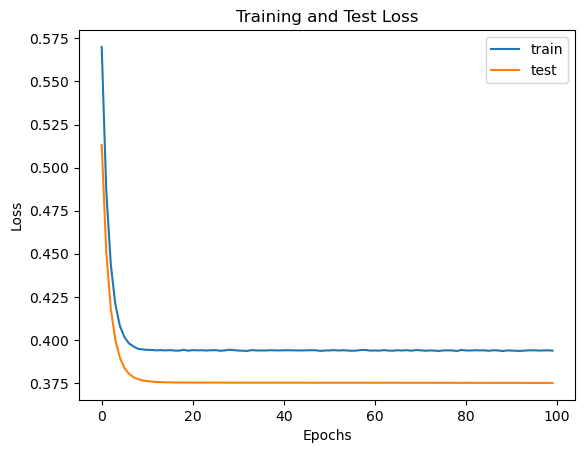

In [32]:
# We have to create a new model class here due the pass-by-reference feature of python functions
model = BinaryClassifier()

# Initialize optimizer
opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)

# Train using optimizer_sgd
train_and_evaluate(model, opt, epochs=100, print_every=10)

#### Train the model trained with the Adam optimizer

Epoch 10/100,Train Loss: 0.3701, Test Loss: 0.3636, Train Auc: 0.6957, Test Auc: 0.6408
Epoch 20/100,Train Loss: 0.3557, Test Loss: 0.3774, Train Auc: 0.7357, Test Auc: 0.6191
Epoch 30/100,Train Loss: 0.3398, Test Loss: 0.4065, Train Auc: 0.7691, Test Auc: 0.5922
Epoch 40/100,Train Loss: 0.3219, Test Loss: 0.4493, Train Auc: 0.7976, Test Auc: 0.5774
Epoch 50/100,Train Loss: 0.3020, Test Loss: 0.4972, Train Auc: 0.8244, Test Auc: 0.5687
Epoch 60/100,Train Loss: 0.2698, Test Loss: 0.7208, Train Auc: 0.8699, Test Auc: 0.5519
Epoch 70/100,Train Loss: 0.2428, Test Loss: 1.0953, Train Auc: 0.8932, Test Auc: 0.5249
Epoch 80/100,Train Loss: 0.2375, Test Loss: 0.9794, Train Auc: 0.9077, Test Auc: 0.5264
Epoch 90/100,Train Loss: 0.2041, Test Loss: 1.3074, Train Auc: 0.9332, Test Auc: 0.5160
Epoch 100/100,Train Loss: 0.1913, Test Loss: 1.4229, Train Auc: 0.9489, Test Auc: 0.5160


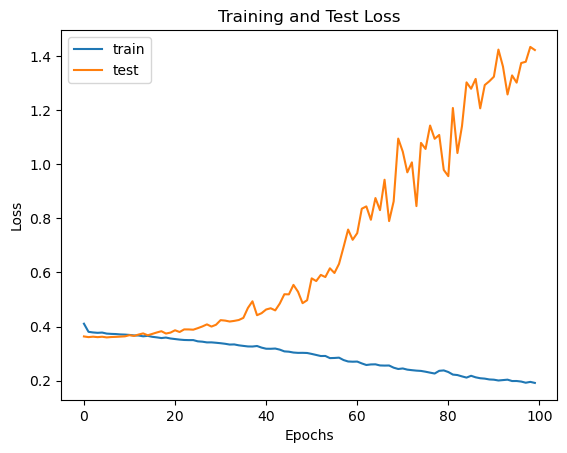

In [33]:
# Initialize Model
model = BinaryClassifier()
#Initialize Optimizer
opt = optim.Adam(model.parameters(), lr=0.001)
# Train using ADAM optimizer
train_and_evaluate(model, opt, epochs=100, print_every=10)

# Optimize models

### Add Dropout Layers, Use Leaky ReLu, Use Batch Normalization

In [34]:
# Define the neural network Model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        # Define layers
        self.layer1 = nn.Linear(train_x.shape[1], 512)  # Input, output
        self.bn1 = nn.BatchNorm1d(512)  # Batch normalization layer
        self.dropout1 = nn.Dropout(0.5)  # Adding dropout layer
        self.layer2 = nn.Linear(512, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.dropout2 = nn.Dropout(0.5)  # Adding dropout layer
        self.layer3 = nn.Linear(256, 128)
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.dropout3 = nn.Dropout(0.5)  # Adding dropout layer
        self.layer4 = nn.Linear(128, 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.dropout4 = nn.Dropout(0.5)  # Adding dropout layer
        self.layer5 = nn.Linear(64, 32)
        self.bn1 = nn.BatchNorm1d(32)  # Batch normalization layer
        self.dropout5 = nn.Dropout(0.5)  # Adding dropout layer
        self.layer6 = nn.Linear(32, 16)
        self.bn1 = nn.BatchNorm1d(16)  # Batch normalization layer
        self.dropout6 = nn.Dropout(0.5)  # Adding dropout layer
        self.layer7 = nn.Linear(16, 1)

        # define dropout layer
        #self.dropout = nn.Dropout(0.2)

    # Define forward pass
    def forward(self, x):
        x = F.leaky_relu(self.layer1(x), negative_slope=0.01)
        x = self.dropout1(x)
        x = F.leaky_relu(self.layer2(x), negative_slope=0.01)
        x = self.dropout2(x)
        x = F.leaky_relu(self.layer3(x), negative_slope=0.01)
        x = self.dropout3(x)
        x = F.leaky_relu(self.layer4(x), negative_slope=0.01)
        x = self.dropout4(x)
        x = F.leaky_relu(self.layer5(x), negative_slope=0.01)
        x = self.dropout5(x)
        x = F.leaky_relu(self.layer6(x), negative_slope=0.01)
        x = self.dropout6(x)
        x = F.sigmoid(self.layer7(x))
        return x

'''
So now we've designed a fully connected dense neural network for our binary classification task. It consists of 7 layers with Leaky ReLU activation functions applied to the first 6 layers and a sigmoid activation function applied to the output of the fourth layer to ensure the output is in the range [0, 1].
'''

"\nSo now we've designed a fully connected dense neural network for our binary classification task. It consists of 7 layers with Leaky ReLU activation functions applied to the first 6 layers and a sigmoid activation function applied to the output of the fourth layer to ensure the output is in the range [0, 1].\n"

Epoch 10/100,Train Loss: 0.3871, Test Loss: 0.3661, Train Auc: 0.6775, Test Auc: 0.6495
Epoch 20/100,Train Loss: 0.3808, Test Loss: 0.3621, Train Auc: 0.6912, Test Auc: 0.6462
Epoch 30/100,Train Loss: 0.3754, Test Loss: 0.3626, Train Auc: 0.7074, Test Auc: 0.6412
Epoch 40/100,Train Loss: 0.3705, Test Loss: 0.3641, Train Auc: 0.7205, Test Auc: 0.6316
Epoch 50/100,Train Loss: 0.3671, Test Loss: 0.3662, Train Auc: 0.7267, Test Auc: 0.6368
Epoch 60/100,Train Loss: 0.3646, Test Loss: 0.3699, Train Auc: 0.7425, Test Auc: 0.6337
Epoch 70/100,Train Loss: 0.3612, Test Loss: 0.3737, Train Auc: 0.7508, Test Auc: 0.6248
Epoch 80/100,Train Loss: 0.3590, Test Loss: 0.3827, Train Auc: 0.7581, Test Auc: 0.6238
Epoch 90/100,Train Loss: 0.3556, Test Loss: 0.3840, Train Auc: 0.7626, Test Auc: 0.6231
Epoch 100/100,Train Loss: 0.3534, Test Loss: 0.3950, Train Auc: 0.7693, Test Auc: 0.6167


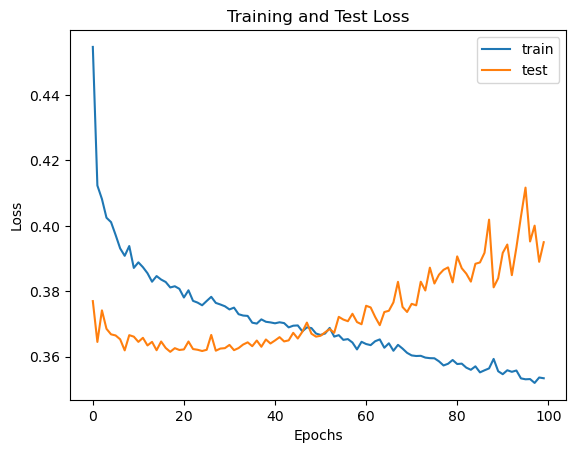

In [35]:
# Initialize Model
model = BinaryClassifier()
#Initialize Optimizer
opt = optim.Adam(model.parameters())
# Train using ADAM optimizer
train_and_evaluate(model, opt, epochs=100, print_every=10)

#### Try optimizing with less dropout

In [36]:
# Define the neural network Model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        # Define layers
        self.layer1 = nn.Linear(train_x.shape[1], 512)  # Input, output
        self.bn1 = nn.BatchNorm1d(512)  # Batch normalization layer
        self.dropout1 = nn.Dropout(0.2)  # Adding dropout layer
        self.layer2 = nn.Linear(512, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.dropout2 = nn.Dropout(0.2)  # Adding dropout layer
        self.layer3 = nn.Linear(256, 128)
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.dropout3 = nn.Dropout(0.2)  # Adding dropout layer
        self.layer4 = nn.Linear(128, 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.dropout4 = nn.Dropout(0.2)  # Adding dropout layer
        self.layer5 = nn.Linear(64, 32)
        self.bn1 = nn.BatchNorm1d(32)  # Batch normalization layer
        self.dropout5 = nn.Dropout(0.2)  # Adding dropout layer
        self.layer6 = nn.Linear(32, 16)
        self.bn1 = nn.BatchNorm1d(16)  # Batch normalization layer
        self.layer7 = nn.Linear(16, 1)

        # define dropout layer
        #self.dropout = nn.Dropout(0.2)

    # Define forward pass
    def forward(self, x):
        x = F.leaky_relu(self.layer1(x), negative_slope=0.01)
        x = self.dropout1(x)
        x = F.leaky_relu(self.layer2(x), negative_slope=0.01)
        x = self.dropout2(x)
        x = F.leaky_relu(self.layer3(x), negative_slope=0.01)
        x = self.dropout3(x)
        x = F.leaky_relu(self.layer4(x), negative_slope=0.01)
        x = self.dropout4(x)
        x = F.leaky_relu(self.layer5(x), negative_slope=0.01)
        x = self.dropout5(x)
        x = F.leaky_relu(self.layer6(x), negative_slope=0.01)
        x = F.sigmoid(self.layer7(x))
        return x

'''
So now we've designed a fully connected dense neural network for our binary classification task. It consists of 7 layers with Leaky ReLU activation functions applied to the first 6 layers and a sigmoid activation function applied to the output of the fourth layer to ensure the output is in the range [0, 1].
'''

"\nSo now we've designed a fully connected dense neural network for our binary classification task. It consists of 7 layers with Leaky ReLU activation functions applied to the first 6 layers and a sigmoid activation function applied to the output of the fourth layer to ensure the output is in the range [0, 1].\n"

Epoch 10/100,Train Loss: 0.3781, Test Loss: 0.3639, Train Auc: 0.6886, Test Auc: 0.6457
Epoch 20/100,Train Loss: 0.3634, Test Loss: 0.3719, Train Auc: 0.7243, Test Auc: 0.6307
Epoch 30/100,Train Loss: 0.3516, Test Loss: 0.3762, Train Auc: 0.7541, Test Auc: 0.6188
Epoch 40/100,Train Loss: 0.3371, Test Loss: 0.4027, Train Auc: 0.7816, Test Auc: 0.6053
Epoch 50/100,Train Loss: 0.3257, Test Loss: 0.4389, Train Auc: 0.8104, Test Auc: 0.5824
Epoch 60/100,Train Loss: 0.3097, Test Loss: 0.5291, Train Auc: 0.8379, Test Auc: 0.5659
Epoch 70/100,Train Loss: 0.3029, Test Loss: 0.4771, Train Auc: 0.8505, Test Auc: 0.5594
Epoch 80/100,Train Loss: 0.2930, Test Loss: 0.5601, Train Auc: 0.8725, Test Auc: 0.5595
Epoch 90/100,Train Loss: 0.2839, Test Loss: 0.5695, Train Auc: 0.8853, Test Auc: 0.5470
Epoch 100/100,Train Loss: 0.2718, Test Loss: 0.7272, Train Auc: 0.8995, Test Auc: 0.5410


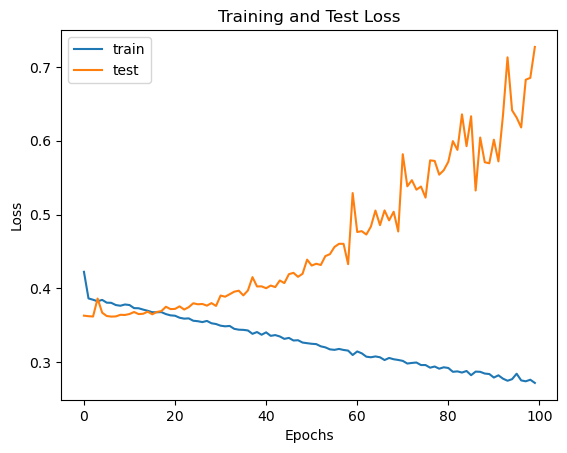

In [44]:
# Initialize Model
model = BinaryClassifier()
#Initialize Optimizer without weight decay
opt = optim.Adam(model.parameters())
# Train using ADAM optimizer
train_and_evaluate(model, opt, epochs=100, print_every=10)

Epoch 10/100,Train Loss: 0.3822, Test Loss: 0.3607, Train Auc: 0.6575, Test Auc: 0.6467
Epoch 20/100,Train Loss: 0.3788, Test Loss: 0.3603, Train Auc: 0.6637, Test Auc: 0.6486
Epoch 30/100,Train Loss: 0.3786, Test Loss: 0.3598, Train Auc: 0.6681, Test Auc: 0.6525
Epoch 40/100,Train Loss: 0.3785, Test Loss: 0.3612, Train Auc: 0.6724, Test Auc: 0.6550
Epoch 50/100,Train Loss: 0.3762, Test Loss: 0.3596, Train Auc: 0.6761, Test Auc: 0.6547
Epoch 60/100,Train Loss: 0.3766, Test Loss: 0.3608, Train Auc: 0.6762, Test Auc: 0.6508
Epoch 70/100,Train Loss: 0.3755, Test Loss: 0.3632, Train Auc: 0.6788, Test Auc: 0.6524
Epoch 80/100,Train Loss: 0.3746, Test Loss: 0.3597, Train Auc: 0.6803, Test Auc: 0.6517
Epoch 90/100,Train Loss: 0.3753, Test Loss: 0.3631, Train Auc: 0.6817, Test Auc: 0.6531
Epoch 100/100,Train Loss: 0.3743, Test Loss: 0.3599, Train Auc: 0.6842, Test Auc: 0.6536


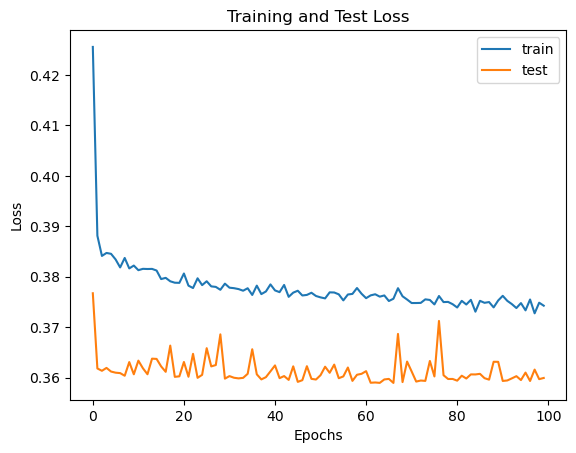

In [38]:
# Initialize Model
model = BinaryClassifier()
#Initialize Optimizer with weight decay
opt = optim.Adam(model.parameters(), weight_decay=1e-3) # 10^3
# Train using ADAM optimizer
train_and_evaluate(model, opt, epochs=100, print_every=10)

### Early Stopping

In [56]:
# Training and Evaluation Loop
def train_and_evaluate_model_es(model, optimizer, batch_size = 128, epochs=25, print_every=5):
    model.train()  # set model to train mode

    train_loss_list=[]
    test_loss_list = []

    best_val_loss = float('inf')
    patience = 0
    max_patience = 10  # Maximum epochs to wait for improvement

    # Convert the tensor based data to torch Dataset objects
    train_dataset = JobChangeDataset(train_x_tensor, train_y_tensor)
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = JobChangeDataset(test_x_tensor, test_y_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # set the model to train mode for each epoch, since we are setting it to eval mode later
        for i, (features, labels) in enumerate(train_loader):
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            outputs = model(features) # pass our data(input features) through the model
            loss = criterion(outputs.squeeze(), labels) # calculate the loss between model outputs and expected labels
            loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
            optimizer.step() # Perform a single optimization step (parameter update)
            train_loss += loss.item() # Accumulate the training loss to later calculate the average
        
        # Calculate the average training loss for current epoch
        train_loss = train_loss / len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on test set
        model.eval() # Switch model to evaluation mode
        test_loss = 0.0
        # Disable gradient calculation for evaluation to save memory and computations
        with torch.no_grad():
            # Iterate over the test dataset
            for features, labels in test_loader:
                outputs = model(features) # Forward pass: compute the output of the model by passing the input features
                loss = criterion(outputs.squeeze(), labels) # Calculate the loss between the model output and expected labels
                test_loss += loss.item() # Accumulate the test loss to later calculate the average
            train_auc = roc_auc_score(train_y_tensor, model(train_x_tensor))
            test_auc = roc_auc_score(test_y_tensor, model(test_x_tensor))
        
        # Calculate test loss for epoch
        test_loss = test_loss / len(test_loader)
        test_loss_list.append(test_loss)

# Implementing Early stoping
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            patience = 0
            # torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience += 1

        if patience >= max_patience:
            print(f'Early stopped at {epoch+1}')
            break  # Stop training

        # Print losses
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs},Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Auc: {train_auc:.4f}, Test Auc: {test_auc:.4f}')

    plt.plot(range(len(train_loss_list)),train_loss_list, label = 'train')
    plt.plot(range(len(train_loss_list)),test_loss_list, label = 'test')
    plt.legend()
    plt.show()
    
    

Epoch 10/100,Train Loss: 0.3760, Test Loss: 0.3602, Train Auc: 0.6890, Test Auc: 0.6509
Early stopped at 20


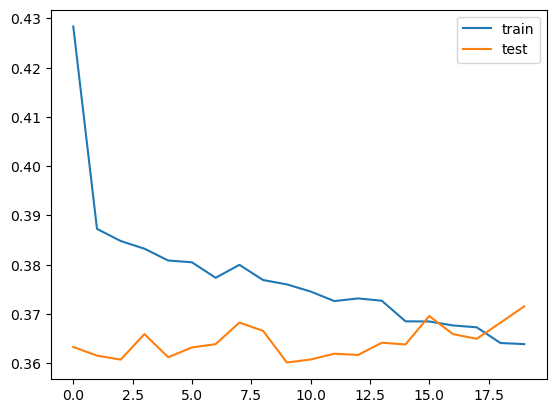

In [57]:
model = BinaryClassifier()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model_es(model, optimizer, epochs=100, print_every=10)

### Now let us see how to tune hyperparameters with the Optuna package

In [62]:
device="cpu"  # 'cuda' or 'cpu'

In [63]:
torch.cuda.is_available()

False

In [69]:
def train_and_evaluate_model_optuna(model, optimizer_optuna, batch_size=512, epochs=25, print_every=5, show_plot=False):
    # model.to(device)  # Move the model to the designated device

    model.train()  # Set model to train mode

    train_loss_list = []
    test_loss_list = []

    # Convert the tensor-based data to torch Dataset objects
    train_dataset = JobChangeDataset(train_x_tensor.to(device), train_y_tensor.to(device))
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    
    test_dataset = JobChangeDataset(test_x_tensor.to(device), test_y_tensor.to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        model.train()
        for features, labels in train_loader:
            # features, labels = features.to(device), labels.to(device)  # Move data to the device

            optimizer_optuna.zero_grad()  # Clear the gradients of all optimized variables
            outputs = model(features)  # Pass data through the model
            loss = criterion(outputs.squeeze(), labels)  # Calculate loss
            loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
            optimizer_optuna.step()  # Perform a single optimization step (parameter update)
            train_loss += loss.item()  # Accumulate the training loss
        
        # Calculate the average training loss for the current epoch
        train_loss /= len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on the test set
        model.eval()  # Switch model to evaluation mode
        test_loss = 0.0
        with torch.no_grad():  # Disable gradient calculation
            for features, labels in test_loader:
                # features, labels = features.to(device), labels.to(device)  # Move data to the device
                outputs = model(features)
                loss = criterion(outputs.squeeze(), labels)
                test_loss += loss.item()
                
        test_loss /= len(test_loader)
        test_loss_list.append(test_loss)

        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
            # set model to evaluation mode
            model.eval()
            with torch.no_grad():
                train_preds = model(train_x_tensor.to(device)).squeeze()
                test_preds = model(test_x_tensor.to(device)).squeeze()
                train_auc = roc_auc_score(train_y_tensor.cpu(), train_preds.cpu())
                test_auc = roc_auc_score(test_y_tensor.cpu(), test_preds.cpu())

            print(f'Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}')
    if (show_plot):
        plt.plot(range(epochs),train_loss_list, label = 'train')
        plt.plot(range(epochs),test_loss_list, label = 'test')
        plt.legend()
        plt.show()

    # Returning the last epoch AUC values for Optuna optimization
    return train_auc, test_auc  


In [73]:
# This is a generic class definition which can be instantiated with different hyperparameters
# by the optuna package, to find the optimal hyperparameter set.

class BinaryClassifierDropoutOptuna(nn.Module):
    def __init__(self, num_features, num_classes, dropout_rate, num_layers, num_nodes):
        super(BinaryClassifierDropoutOptuna, self).__init__()
        layers = []
        prev_nodes = num_features  # Input size
        
        # Dynamically create layers based on num_layers and num_nodes
        for _ in range(num_layers):
            layers.append(nn.Linear(prev_nodes, num_nodes))
            layers.append(nn.LeakyReLU())
            layers.append(nn.Dropout(dropout_rate))
            layers.append(nn.BatchNorm1d(num_nodes))
            prev_nodes = num_nodes  # Update prev_nodes for the next layer
        
        # Output layer
        layers.append(nn.Linear(prev_nodes, num_classes))
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x):
        x = self.layers(x)
        x = torch.sigmoid(x)  
        return x

In [ ]:
def objective(trial):
    # Hyperparameters to be optimized
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5) # trial range will be from 0.1 to 0.5
    num_layers = trial.suggest_int('num_layers', 1, 3)  # Suggesting 1 to 3 layers
    num_nodes = trial.suggest_categorical('num_nodes', [64, 128])  # Nodes per layer options
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    
    # Model instantiation
    model = BinaryClassifierDropoutOptuna(num_features=X_train.shape[1], num_classes=1, 
                                    dropout_rate=dropout_rate, num_layers=num_layers, num_nodes=num_nodes)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Train and evaluate the model
    train_auc, test_auc = train_and_evaluate_model_optuna(model, optimizer, epochs=30, print_every=10)
    
    return test_auc


In [74]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Display the best trial results
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-04-07 18:37:55,204] A new study created in memory with name: no-name-5e675c18-7ed6-4cbf-8f3a-d1a8a927c275


Epoch 10/30, Train Loss: 0.7144, Test Loss: 0.6301
Train AUC: 0.5797, Test AUC: 0.5710
Epoch 20/30, Train Loss: 0.6914, Test Loss: 0.6160
Train AUC: 0.5990, Test AUC: 0.5903


[I 2024-04-07 18:38:01,555] Trial 0 finished with value: 0.5949719415622203 and parameters: {'dropout_rate': 0.48921285263602565, 'num_layers': 3, 'num_nodes': 64, 'lr': 3.92916321056359e-05}. Best is trial 0 with value: 0.5949719415622203.


Epoch 30/30, Train Loss: 0.6737, Test Loss: 0.5970
Train AUC: 0.6067, Test AUC: 0.5950
Epoch 10/30, Train Loss: 0.3742, Test Loss: 0.3580
Train AUC: 0.6893, Test AUC: 0.6334
Epoch 20/30, Train Loss: 0.3688, Test Loss: 0.3618
Train AUC: 0.7144, Test AUC: 0.6328


[I 2024-04-07 18:38:09,037] Trial 1 finished with value: 0.6249248768933916 and parameters: {'dropout_rate': 0.2646657226302582, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.005528653452073961}. Best is trial 1 with value: 0.6249248768933916.


Epoch 30/30, Train Loss: 0.3640, Test Loss: 0.3660
Train AUC: 0.7290, Test AUC: 0.6249
Epoch 10/30, Train Loss: 0.6831, Test Loss: 0.6437
Train AUC: 0.6236, Test AUC: 0.5930
Epoch 20/30, Train Loss: 0.6630, Test Loss: 0.6321
Train AUC: 0.6474, Test AUC: 0.6065


[I 2024-04-07 18:38:16,532] Trial 2 finished with value: 0.6128970124314703 and parameters: {'dropout_rate': 0.13981892115429534, 'num_layers': 3, 'num_nodes': 128, 'lr': 2.3456021073281334e-05}. Best is trial 1 with value: 0.6249248768933916.


Epoch 30/30, Train Loss: 0.6459, Test Loss: 0.6188
Train AUC: 0.6613, Test AUC: 0.6129
Epoch 10/30, Train Loss: 0.3792, Test Loss: 0.3553
Train AUC: 0.6649, Test AUC: 0.6466
Epoch 20/30, Train Loss: 0.3792, Test Loss: 0.3572
Train AUC: 0.6638, Test AUC: 0.6433


[I 2024-04-07 18:38:21,545] Trial 3 finished with value: 0.646912210610139 and parameters: {'dropout_rate': 0.36174290280311017, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.09455819087679213}. Best is trial 3 with value: 0.646912210610139.


Epoch 30/30, Train Loss: 0.3795, Test Loss: 0.3556
Train AUC: 0.6661, Test AUC: 0.6469
Epoch 10/30, Train Loss: 0.6794, Test Loss: 0.6903
Train AUC: 0.5996, Test AUC: 0.5863
Epoch 20/30, Train Loss: 0.6563, Test Loss: 0.6694
Train AUC: 0.6225, Test AUC: 0.6046


[I 2024-04-07 18:38:29,492] Trial 4 finished with value: 0.6133826326948011 and parameters: {'dropout_rate': 0.38665719269613763, 'num_layers': 3, 'num_nodes': 128, 'lr': 2.279422000385694e-05}. Best is trial 3 with value: 0.646912210610139.


Epoch 30/30, Train Loss: 0.6407, Test Loss: 0.6508
Train AUC: 0.6338, Test AUC: 0.6134
Epoch 10/30, Train Loss: 0.4086, Test Loss: 0.3741
Train AUC: 0.6933, Test AUC: 0.6105
Epoch 20/30, Train Loss: 0.3810, Test Loss: 0.3585
Train AUC: 0.7141, Test AUC: 0.6263


[I 2024-04-07 18:38:34,964] Trial 5 finished with value: 0.627995821011329 and parameters: {'dropout_rate': 0.17510844519808302, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0005706235198524386}. Best is trial 3 with value: 0.646912210610139.


Epoch 30/30, Train Loss: 0.3740, Test Loss: 0.3597
Train AUC: 0.7257, Test AUC: 0.6280
Epoch 10/30, Train Loss: 0.5732, Test Loss: 0.5643
Train AUC: 0.6345, Test AUC: 0.6318
Epoch 20/30, Train Loss: 0.4566, Test Loss: 0.4250
Train AUC: 0.6485, Test AUC: 0.6397


[I 2024-04-07 18:38:41,719] Trial 6 finished with value: 0.6421240696815733 and parameters: {'dropout_rate': 0.448887318867462, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.0002450485969729137}. Best is trial 3 with value: 0.646912210610139.


Epoch 30/30, Train Loss: 0.4134, Test Loss: 0.3720
Train AUC: 0.6574, Test AUC: 0.6421
Epoch 10/30, Train Loss: 0.3786, Test Loss: 0.3562
Train AUC: 0.6635, Test AUC: 0.6480
Epoch 20/30, Train Loss: 0.3804, Test Loss: 0.3572
Train AUC: 0.6643, Test AUC: 0.6403


[I 2024-04-07 18:38:47,273] Trial 7 finished with value: 0.6413216221826707 and parameters: {'dropout_rate': 0.2257239973274579, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.09253905289875618}. Best is trial 3 with value: 0.646912210610139.


Epoch 30/30, Train Loss: 0.3823, Test Loss: 0.3581
Train AUC: 0.6653, Test AUC: 0.6413
Epoch 10/30, Train Loss: 0.5949, Test Loss: 0.5595
Train AUC: 0.6565, Test AUC: 0.6266
Epoch 20/30, Train Loss: 0.4786, Test Loss: 0.4345
Train AUC: 0.6755, Test AUC: 0.6239


[I 2024-04-07 18:38:53,292] Trial 8 finished with value: 0.6295724704016661 and parameters: {'dropout_rate': 0.2461654795209166, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0001948837332341984}. Best is trial 3 with value: 0.646912210610139.


Epoch 30/30, Train Loss: 0.4114, Test Loss: 0.3718
Train AUC: 0.6875, Test AUC: 0.6296
Epoch 10/30, Train Loss: 0.3809, Test Loss: 0.3543
Train AUC: 0.6793, Test AUC: 0.6499
Epoch 20/30, Train Loss: 0.3748, Test Loss: 0.3566
Train AUC: 0.6831, Test AUC: 0.6474


[I 2024-04-07 18:39:01,147] Trial 9 finished with value: 0.6488128337150461 and parameters: {'dropout_rate': 0.31800089840822215, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.02995078041752302}. Best is trial 9 with value: 0.6488128337150461.


Epoch 30/30, Train Loss: 0.3730, Test Loss: 0.3533
Train AUC: 0.6895, Test AUC: 0.6488
Epoch 10/30, Train Loss: 0.3754, Test Loss: 0.3538
Train AUC: 0.6872, Test AUC: 0.6487
Epoch 20/30, Train Loss: 0.3720, Test Loss: 0.3617
Train AUC: 0.6943, Test AUC: 0.6345


[I 2024-04-07 18:39:07,539] Trial 10 finished with value: 0.6468162436064536 and parameters: {'dropout_rate': 0.3526168678068766, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.008251528384026704}. Best is trial 9 with value: 0.6488128337150461.


Epoch 30/30, Train Loss: 0.3689, Test Loss: 0.3582
Train AUC: 0.7110, Test AUC: 0.6468
Epoch 10/30, Train Loss: 0.3815, Test Loss: 0.3556
Train AUC: 0.6707, Test AUC: 0.6441
Epoch 20/30, Train Loss: 0.3794, Test Loss: 0.3665
Train AUC: 0.6715, Test AUC: 0.6418


[I 2024-04-07 18:39:12,626] Trial 11 finished with value: 0.6496094959690456 and parameters: {'dropout_rate': 0.3413719429479331, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.08626466845551252}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3812, Test Loss: 0.3583
Train AUC: 0.6699, Test AUC: 0.6496
Epoch 10/30, Train Loss: 0.3759, Test Loss: 0.3604
Train AUC: 0.6770, Test AUC: 0.6381
Epoch 20/30, Train Loss: 0.3713, Test Loss: 0.3589
Train AUC: 0.6933, Test AUC: 0.6372


[I 2024-04-07 18:39:17,114] Trial 12 finished with value: 0.6451814014585624 and parameters: {'dropout_rate': 0.29824448961901345, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.014055712978872734}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3698, Test Loss: 0.3584
Train AUC: 0.6957, Test AUC: 0.6452
Epoch 10/30, Train Loss: 0.3744, Test Loss: 0.3536
Train AUC: 0.6759, Test AUC: 0.6526
Epoch 20/30, Train Loss: 0.3759, Test Loss: 0.3565
Train AUC: 0.6788, Test AUC: 0.6455


[I 2024-04-07 18:39:22,121] Trial 13 finished with value: 0.6491796863036028 and parameters: {'dropout_rate': 0.4125083925088498, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.02485200235644917}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3745, Test Loss: 0.3537
Train AUC: 0.6828, Test AUC: 0.6492
Epoch 10/30, Train Loss: 0.3795, Test Loss: 0.3595
Train AUC: 0.7028, Test AUC: 0.6295
Epoch 20/30, Train Loss: 0.3709, Test Loss: 0.3583
Train AUC: 0.7105, Test AUC: 0.6354


[I 2024-04-07 18:39:27,017] Trial 14 finished with value: 0.6351593154353736 and parameters: {'dropout_rate': 0.42156176474735196, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.0017130951398312763}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3677, Test Loss: 0.3587
Train AUC: 0.7150, Test AUC: 0.6352
Epoch 10/30, Train Loss: 0.3770, Test Loss: 0.3560
Train AUC: 0.6743, Test AUC: 0.6566
Epoch 20/30, Train Loss: 0.3778, Test Loss: 0.3551
Train AUC: 0.6732, Test AUC: 0.6433


[I 2024-04-07 18:39:31,677] Trial 15 finished with value: 0.6383684248139363 and parameters: {'dropout_rate': 0.40716638300290514, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.030360484402577277}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3754, Test Loss: 0.3586
Train AUC: 0.6780, Test AUC: 0.6384
Epoch 10/30, Train Loss: 0.3794, Test Loss: 0.3561
Train AUC: 0.6909, Test AUC: 0.6454
Epoch 20/30, Train Loss: 0.3714, Test Loss: 0.3553
Train AUC: 0.6998, Test AUC: 0.6426


[I 2024-04-07 18:39:36,593] Trial 16 finished with value: 0.6390538061806833 and parameters: {'dropout_rate': 0.4937310361703922, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.0025500281060623813}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3717, Test Loss: 0.3555
Train AUC: 0.7049, Test AUC: 0.6391
Epoch 10/30, Train Loss: 0.3762, Test Loss: 0.3556
Train AUC: 0.6692, Test AUC: 0.6458
Epoch 20/30, Train Loss: 0.3747, Test Loss: 0.3560
Train AUC: 0.6841, Test AUC: 0.6500


[I 2024-04-07 18:39:42,307] Trial 17 finished with value: 0.6463860936324872 and parameters: {'dropout_rate': 0.31937803450155666, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.038251024139097825}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3730, Test Loss: 0.3550
Train AUC: 0.6860, Test AUC: 0.6464
Epoch 10/30, Train Loss: 0.3812, Test Loss: 0.3552
Train AUC: 0.6774, Test AUC: 0.6485
Epoch 20/30, Train Loss: 0.3758, Test Loss: 0.3543
Train AUC: 0.6862, Test AUC: 0.6452


[I 2024-04-07 18:39:48,250] Trial 18 finished with value: 0.6420961643826293 and parameters: {'dropout_rate': 0.450937243074645, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.004738084592982398}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3753, Test Loss: 0.3561
Train AUC: 0.6895, Test AUC: 0.6421
Epoch 10/30, Train Loss: 0.3757, Test Loss: 0.3606
Train AUC: 0.6760, Test AUC: 0.6417
Epoch 20/30, Train Loss: 0.3730, Test Loss: 0.3608
Train AUC: 0.6885, Test AUC: 0.6357


[I 2024-04-07 18:39:52,962] Trial 19 finished with value: 0.6406576802529172 and parameters: {'dropout_rate': 0.36595116472700323, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.01321221216980249}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3695, Test Loss: 0.3570
Train AUC: 0.6954, Test AUC: 0.6407
Epoch 10/30, Train Loss: 0.3751, Test Loss: 0.3552
Train AUC: 0.6733, Test AUC: 0.6458
Epoch 20/30, Train Loss: 0.3768, Test Loss: 0.3539
Train AUC: 0.6777, Test AUC: 0.6488


[I 2024-04-07 18:39:57,975] Trial 20 finished with value: 0.6338477663850046 and parameters: {'dropout_rate': 0.21411014141144902, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.04916672070480866}. Best is trial 11 with value: 0.6496094959690456.


Epoch 30/30, Train Loss: 0.3757, Test Loss: 0.3567
Train AUC: 0.6690, Test AUC: 0.6338
Epoch 10/30, Train Loss: 0.3770, Test Loss: 0.3603
Train AUC: 0.6696, Test AUC: 0.6404
Epoch 20/30, Train Loss: 0.3722, Test Loss: 0.3556
Train AUC: 0.6931, Test AUC: 0.6465


[I 2024-04-07 18:40:03,873] Trial 21 finished with value: 0.6503442220717301 and parameters: {'dropout_rate': 0.3190506551950377, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.024669433986497444}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3711, Test Loss: 0.3585
Train AUC: 0.6956, Test AUC: 0.6503
Epoch 10/30, Train Loss: 0.3759, Test Loss: 0.3550
Train AUC: 0.6796, Test AUC: 0.6475
Epoch 20/30, Train Loss: 0.3724, Test Loss: 0.3571
Train AUC: 0.6878, Test AUC: 0.6466


[I 2024-04-07 18:40:09,695] Trial 22 finished with value: 0.6401737615322051 and parameters: {'dropout_rate': 0.31647826372877935, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.020926194773112868}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3716, Test Loss: 0.3580
Train AUC: 0.6996, Test AUC: 0.6402
Epoch 10/30, Train Loss: 0.3762, Test Loss: 0.3552
Train AUC: 0.6767, Test AUC: 0.6504
Epoch 20/30, Train Loss: 0.3774, Test Loss: 0.3556
Train AUC: 0.6823, Test AUC: 0.6509


[I 2024-04-07 18:40:15,465] Trial 23 finished with value: 0.6460941089191461 and parameters: {'dropout_rate': 0.28542389241045946, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.06268705009934324}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3747, Test Loss: 0.3600
Train AUC: 0.6905, Test AUC: 0.6461
Epoch 10/30, Train Loss: 0.3764, Test Loss: 0.3577
Train AUC: 0.6799, Test AUC: 0.6451
Epoch 20/30, Train Loss: 0.3738, Test Loss: 0.3560
Train AUC: 0.6883, Test AUC: 0.6427


[I 2024-04-07 18:40:20,295] Trial 24 finished with value: 0.6401941800436275 and parameters: {'dropout_rate': 0.34447764013091, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.013210839828129112}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3705, Test Loss: 0.3569
Train AUC: 0.6948, Test AUC: 0.6402
Epoch 10/30, Train Loss: 0.3741, Test Loss: 0.3573
Train AUC: 0.6919, Test AUC: 0.6414
Epoch 20/30, Train Loss: 0.3711, Test Loss: 0.3577
Train AUC: 0.7019, Test AUC: 0.6460


[I 2024-04-07 18:40:24,936] Trial 25 finished with value: 0.6353954895508267 and parameters: {'dropout_rate': 0.40869831552569486, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.004239376299238975}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3683, Test Loss: 0.3577
Train AUC: 0.7124, Test AUC: 0.6354
Epoch 10/30, Train Loss: 0.3935, Test Loss: 0.3593
Train AUC: 0.6738, Test AUC: 0.6254
Epoch 20/30, Train Loss: 0.3832, Test Loss: 0.3581
Train AUC: 0.6851, Test AUC: 0.6361


[I 2024-04-07 18:40:30,802] Trial 26 finished with value: 0.6478058607933953 and parameters: {'dropout_rate': 0.4463204878650475, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0012888490451183935}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3781, Test Loss: 0.3559
Train AUC: 0.6939, Test AUC: 0.6478
Epoch 10/30, Train Loss: 0.3965, Test Loss: 0.3607
Train AUC: 0.6846, Test AUC: 0.6313
Epoch 20/30, Train Loss: 0.3813, Test Loss: 0.3587
Train AUC: 0.7016, Test AUC: 0.6355


[I 2024-04-07 18:40:35,571] Trial 27 finished with value: 0.6356697782209351 and parameters: {'dropout_rate': 0.38001445883108204, 'num_layers': 1, 'num_nodes': 128, 'lr': 0.000645669478818793}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3744, Test Loss: 0.3585
Train AUC: 0.7080, Test AUC: 0.6357
Epoch 10/30, Train Loss: 0.3752, Test Loss: 0.3546
Train AUC: 0.6793, Test AUC: 0.6473
Epoch 20/30, Train Loss: 0.3736, Test Loss: 0.3581
Train AUC: 0.6919, Test AUC: 0.6407


[I 2024-04-07 18:40:41,017] Trial 28 finished with value: 0.6379525677979656 and parameters: {'dropout_rate': 0.33944124033739176, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.01846742468244038}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3727, Test Loss: 0.3585
Train AUC: 0.6997, Test AUC: 0.6380
Epoch 10/30, Train Loss: 0.3790, Test Loss: 0.3661
Train AUC: 0.6685, Test AUC: 0.6456
Epoch 20/30, Train Loss: 0.3753, Test Loss: 0.3542
Train AUC: 0.6761, Test AUC: 0.6483


[I 2024-04-07 18:40:46,017] Trial 29 finished with value: 0.6477936096865418 and parameters: {'dropout_rate': 0.2731479722399086, 'num_layers': 1, 'num_nodes': 64, 'lr': 0.054006223768597275}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3752, Test Loss: 0.3551
Train AUC: 0.6768, Test AUC: 0.6478
Epoch 10/30, Train Loss: 0.6352, Test Loss: 0.5656
Train AUC: 0.6478, Test AUC: 0.6389
Epoch 20/30, Train Loss: 0.5858, Test Loss: 0.5214
Train AUC: 0.6604, Test AUC: 0.6426


[I 2024-04-07 18:40:52,396] Trial 30 finished with value: 0.6396772513961158 and parameters: {'dropout_rate': 0.4603422180809371, 'num_layers': 2, 'num_nodes': 128, 'lr': 8.505182727654417e-05}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.5196, Test Loss: 0.4591
Train AUC: 0.6675, Test AUC: 0.6397
Epoch 10/30, Train Loss: 0.3784, Test Loss: 0.3541
Train AUC: 0.6779, Test AUC: 0.6492
Epoch 20/30, Train Loss: 0.3740, Test Loss: 0.3559
Train AUC: 0.6825, Test AUC: 0.6411


[I 2024-04-07 18:40:59,166] Trial 31 finished with value: 0.6420920806803447 and parameters: {'dropout_rate': 0.3218823672198697, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.025302321048390926}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3715, Test Loss: 0.3581
Train AUC: 0.6981, Test AUC: 0.6421
Epoch 10/30, Train Loss: 0.3764, Test Loss: 0.3594
Train AUC: 0.6877, Test AUC: 0.6442
Epoch 20/30, Train Loss: 0.3714, Test Loss: 0.3601
Train AUC: 0.7030, Test AUC: 0.6395


[I 2024-04-07 18:41:06,290] Trial 32 finished with value: 0.6324395697139026 and parameters: {'dropout_rate': 0.26141861155407836, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.009160399426258022}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3670, Test Loss: 0.3605
Train AUC: 0.7191, Test AUC: 0.6324
Epoch 10/30, Train Loss: 0.3791, Test Loss: 0.3560
Train AUC: 0.6780, Test AUC: 0.6469
Epoch 20/30, Train Loss: 0.3737, Test Loss: 0.3570
Train AUC: 0.6925, Test AUC: 0.6432


[I 2024-04-07 18:41:13,684] Trial 33 finished with value: 0.6434213257739467 and parameters: {'dropout_rate': 0.304019660099748, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.033373043340196216}. Best is trial 21 with value: 0.6503442220717301.


Epoch 30/30, Train Loss: 0.3716, Test Loss: 0.3623
Train AUC: 0.6992, Test AUC: 0.6434
Epoch 10/30, Train Loss: 0.3805, Test Loss: 0.3539
Train AUC: 0.6715, Test AUC: 0.6496
Epoch 20/30, Train Loss: 0.3778, Test Loss: 0.3557
Train AUC: 0.6797, Test AUC: 0.6460


[I 2024-04-07 18:41:20,696] Trial 34 finished with value: 0.6520726490636412 and parameters: {'dropout_rate': 0.3984918873984537, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.07894191631591979}. Best is trial 34 with value: 0.6520726490636412.


Epoch 30/30, Train Loss: 0.3796, Test Loss: 0.3558
Train AUC: 0.6865, Test AUC: 0.6521
Epoch 10/30, Train Loss: 0.3813, Test Loss: 0.3584
Train AUC: 0.6681, Test AUC: 0.6534
Epoch 20/30, Train Loss: 0.3807, Test Loss: 0.3625
Train AUC: 0.6731, Test AUC: 0.6504


[I 2024-04-07 18:41:27,429] Trial 35 finished with value: 0.6510153104804816 and parameters: {'dropout_rate': 0.4024238926898919, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.09723652938748135}. Best is trial 34 with value: 0.6520726490636412.


Epoch 30/30, Train Loss: 0.3799, Test Loss: 0.3564
Train AUC: 0.6801, Test AUC: 0.6510
Epoch 10/30, Train Loss: 0.3821, Test Loss: 0.3549
Train AUC: 0.6684, Test AUC: 0.6469
Epoch 20/30, Train Loss: 0.3818, Test Loss: 0.3555
Train AUC: 0.6744, Test AUC: 0.6487


[I 2024-04-07 18:41:34,258] Trial 36 finished with value: 0.6562189681164945 and parameters: {'dropout_rate': 0.3771820741075653, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.09479212683766614}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3798, Test Loss: 0.3561
Train AUC: 0.6833, Test AUC: 0.6562
Epoch 10/30, Train Loss: 0.7097, Test Loss: 0.6525
Train AUC: 0.5769, Test AUC: 0.5762
Epoch 20/30, Train Loss: 0.6985, Test Loss: 0.6454
Train AUC: 0.6036, Test AUC: 0.5873


[I 2024-04-07 18:41:41,690] Trial 37 finished with value: 0.594591816941239 and parameters: {'dropout_rate': 0.3854023353435525, 'num_layers': 3, 'num_nodes': 128, 'lr': 1.0484108368404789e-05}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.6917, Test Loss: 0.6370
Train AUC: 0.6194, Test AUC: 0.5946
Epoch 10/30, Train Loss: 0.3822, Test Loss: 0.3549
Train AUC: 0.6650, Test AUC: 0.6449
Epoch 20/30, Train Loss: 0.3805, Test Loss: 0.3593
Train AUC: 0.6729, Test AUC: 0.6452


[I 2024-04-07 18:41:47,412] Trial 38 finished with value: 0.6544833946455857 and parameters: {'dropout_rate': 0.43114849315819653, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.09883918946769235}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3797, Test Loss: 0.3571
Train AUC: 0.6752, Test AUC: 0.6545
Epoch 10/30, Train Loss: 0.3828, Test Loss: 0.3557
Train AUC: 0.6631, Test AUC: 0.6441
Epoch 20/30, Train Loss: 0.3801, Test Loss: 0.3545
Train AUC: 0.6685, Test AUC: 0.6481


[I 2024-04-07 18:41:53,565] Trial 39 finished with value: 0.648594015334302 and parameters: {'dropout_rate': 0.4746804182753436, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.09854982084692276}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3815, Test Loss: 0.3558
Train AUC: 0.6749, Test AUC: 0.6486
Epoch 10/30, Train Loss: 0.3764, Test Loss: 0.3552
Train AUC: 0.6762, Test AUC: 0.6485
Epoch 20/30, Train Loss: 0.3708, Test Loss: 0.3559
Train AUC: 0.6877, Test AUC: 0.6400


[I 2024-04-07 18:42:00,179] Trial 40 finished with value: 0.634940156746106 and parameters: {'dropout_rate': 0.11119507027593073, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.061897216143151926}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3694, Test Loss: 0.3587
Train AUC: 0.7035, Test AUC: 0.6349
Epoch 10/30, Train Loss: 0.3796, Test Loss: 0.3574
Train AUC: 0.6686, Test AUC: 0.6532
Epoch 20/30, Train Loss: 0.3790, Test Loss: 0.3564
Train AUC: 0.6775, Test AUC: 0.6545


[I 2024-04-07 18:42:06,491] Trial 41 finished with value: 0.6450017185580448 and parameters: {'dropout_rate': 0.39083244756288316, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.05946655030256573}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3771, Test Loss: 0.3549
Train AUC: 0.6809, Test AUC: 0.6450
Epoch 10/30, Train Loss: 0.3808, Test Loss: 0.3559
Train AUC: 0.6669, Test AUC: 0.6475
Epoch 20/30, Train Loss: 0.3803, Test Loss: 0.3562
Train AUC: 0.6696, Test AUC: 0.6532


[I 2024-04-07 18:42:12,509] Trial 42 finished with value: 0.6491419120574713 and parameters: {'dropout_rate': 0.4333208433010505, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.08755311883644758}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3794, Test Loss: 0.3616
Train AUC: 0.6790, Test AUC: 0.6491
Epoch 10/30, Train Loss: 0.3780, Test Loss: 0.3547
Train AUC: 0.6700, Test AUC: 0.6498
Epoch 20/30, Train Loss: 0.3752, Test Loss: 0.3533
Train AUC: 0.6815, Test AUC: 0.6524


[I 2024-04-07 18:42:18,881] Trial 43 finished with value: 0.6522468870277793 and parameters: {'dropout_rate': 0.3677178078256438, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.03771308972162259}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3761, Test Loss: 0.3563
Train AUC: 0.6897, Test AUC: 0.6522
Epoch 10/30, Train Loss: 0.3804, Test Loss: 0.3559
Train AUC: 0.6641, Test AUC: 0.6453
Epoch 20/30, Train Loss: 0.3802, Test Loss: 0.3535
Train AUC: 0.6700, Test AUC: 0.6529


[I 2024-04-07 18:42:24,770] Trial 44 finished with value: 0.6518109518089099 and parameters: {'dropout_rate': 0.4328823915147901, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.05999505461304659}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3781, Test Loss: 0.3537
Train AUC: 0.6734, Test AUC: 0.6518
Epoch 10/30, Train Loss: 0.3800, Test Loss: 0.3543
Train AUC: 0.6732, Test AUC: 0.6524
Epoch 20/30, Train Loss: 0.3790, Test Loss: 0.3549
Train AUC: 0.6746, Test AUC: 0.6461


[I 2024-04-07 18:42:30,461] Trial 45 finished with value: 0.6530683918040094 and parameters: {'dropout_rate': 0.4278311280401636, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.03809326044922076}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3765, Test Loss: 0.3517
Train AUC: 0.6803, Test AUC: 0.6531
Epoch 10/30, Train Loss: 0.3794, Test Loss: 0.3523
Train AUC: 0.6692, Test AUC: 0.6535
Epoch 20/30, Train Loss: 0.3773, Test Loss: 0.3565
Train AUC: 0.6812, Test AUC: 0.6529


[I 2024-04-07 18:42:36,607] Trial 46 finished with value: 0.650147864053551 and parameters: {'dropout_rate': 0.3653612418277548, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.04042201494194838}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3779, Test Loss: 0.3545
Train AUC: 0.6827, Test AUC: 0.6501
Epoch 10/30, Train Loss: 0.3791, Test Loss: 0.3543
Train AUC: 0.6715, Test AUC: 0.6496
Epoch 20/30, Train Loss: 0.3760, Test Loss: 0.3542
Train AUC: 0.6808, Test AUC: 0.6469


[I 2024-04-07 18:42:43,028] Trial 47 finished with value: 0.6428291889426954 and parameters: {'dropout_rate': 0.42220843312295453, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.007703308401556946}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3752, Test Loss: 0.3554
Train AUC: 0.6836, Test AUC: 0.6428
Epoch 10/30, Train Loss: 0.3786, Test Loss: 0.3536
Train AUC: 0.6683, Test AUC: 0.6480
Epoch 20/30, Train Loss: 0.3779, Test Loss: 0.3550
Train AUC: 0.6752, Test AUC: 0.6478


[I 2024-04-07 18:42:49,123] Trial 48 finished with value: 0.6495509629029678 and parameters: {'dropout_rate': 0.47355167809059395, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.018099364910022012}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3773, Test Loss: 0.3563
Train AUC: 0.6834, Test AUC: 0.6496
Epoch 10/30, Train Loss: 0.3791, Test Loss: 0.3536
Train AUC: 0.6734, Test AUC: 0.6524
Epoch 20/30, Train Loss: 0.3769, Test Loss: 0.3526
Train AUC: 0.6785, Test AUC: 0.6501


[I 2024-04-07 18:42:55,430] Trial 49 finished with value: 0.6463030583527027 and parameters: {'dropout_rate': 0.3739421094734833, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.03786344221648208}. Best is trial 36 with value: 0.6562189681164945.


Epoch 30/30, Train Loss: 0.3745, Test Loss: 0.3552
Train AUC: 0.6808, Test AUC: 0.6463
Best trial:
  Value:  0.6562189681164945
  Params: 
    dropout_rate: 0.3771820741075653
    num_layers: 3
    num_nodes: 128
    lr: 0.09479212683766614


### Now lets use the hyperparameters suggested by Optuna to improve the model performance

In [75]:
# Optuna best trial hyperparameters
# The folloowing hyperparamters is from one of the runs, 
# and works well(train and test losses do not diverge much across training epochs)
# dropout_rate = 0.3771820741075653
# num_layers = 3
# num_nodes = 128
# lr = 0.09479212683766614

dropout_rate = trial.params['dropout_rate']
num_layers = trial.params['num_layers']    # Number of layers we want in model
num_nodes = trial.params['num_nodes']      # Max Number of neurons we want in our model
lr = trial.params['lr']


num_features = train_x.shape[1]  
num_classes = 1  # For binary classification

# Initialize model with best hyperparameters
model = BinaryClassifierDropoutOptuna(num_features=num_features, num_classes=num_classes, 
                                 dropout_rate=dropout_rate, num_layers=num_layers, num_nodes=num_nodes).to(device)


Epoch 10/200, Train Loss: 0.3800, Test Loss: 0.3551
Train AUC: 0.6710, Test AUC: 0.6537
Epoch 20/200, Train Loss: 0.3766, Test Loss: 0.3534
Train AUC: 0.6788, Test AUC: 0.6557
Epoch 30/200, Train Loss: 0.3806, Test Loss: 0.3535
Train AUC: 0.6807, Test AUC: 0.6481
Epoch 40/200, Train Loss: 0.3778, Test Loss: 0.3558
Train AUC: 0.6856, Test AUC: 0.6506
Epoch 50/200, Train Loss: 0.3771, Test Loss: 0.3522
Train AUC: 0.6919, Test AUC: 0.6528
Epoch 60/200, Train Loss: 0.3751, Test Loss: 0.3576
Train AUC: 0.6917, Test AUC: 0.6453
Epoch 70/200, Train Loss: 0.3743, Test Loss: 0.3546
Train AUC: 0.7047, Test AUC: 0.6513
Epoch 80/200, Train Loss: 0.3749, Test Loss: 0.3580
Train AUC: 0.7009, Test AUC: 0.6439
Epoch 90/200, Train Loss: 0.3728, Test Loss: 0.3603
Train AUC: 0.7087, Test AUC: 0.6456
Epoch 100/200, Train Loss: 0.3756, Test Loss: 0.3656
Train AUC: 0.7146, Test AUC: 0.6430
Epoch 110/200, Train Loss: 0.3704, Test Loss: 0.3658
Train AUC: 0.7224, Test AUC: 0.6385
Epoch 120/200, Train Loss: 0.3

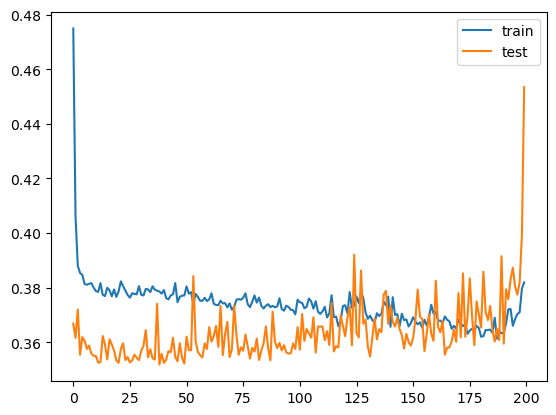

In [76]:
optimizer = optim.Adam(model.parameters(), lr=lr)

epochs = 200  # Try the hyerparameters suggested by Optuna with higher number of epochs

train_auc, test_auc = train_and_evaluate_model_optuna(model, optimizer, epochs=epochs, print_every=10, show_plot=True)


# Saving Model

### 1. Save using State_dict   (saves only imp parameters)

In [77]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
# Rebuild the model architecture
model = YourModelClass(*args, **kwargs)  # Provide necessary arguments for model initialization

# Load the model state dictionary
model.load_state_dict(torch.load("model_state_dict.pt"))

### 2. Save whole model

In [ ]:
torch.save(model, "model.pt")

### 3. Load Model

In [ ]:
model = torch.load("model.pt")